In [2]:
#import wget
import os
import glob
import random
import numpy as np
import os,shutil
import matplotlib 
import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imread
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.utils.data as Data

In [3]:
mydir = r'C:\\Users\\炸酱面\\Downloads\\project\\warwick_qu_dataset_released_2016_07_08\\Warwick QU Dataset (Released 2016_07_08)'

In [4]:
#get dataset




# class cellDataset(Dataset):
   
#     def __init__(self, root, datasetype, augment=None):
#         # 这个list存放所有图像的地址
       
#         self.image_files=[]
#         self.mask_files=[]
#         if datasetype == 'testA':
#             self.image_files = np.array([x.path for x in os.scandir(root) if
#         x.name.startswith('testA')==True and x.name.endswith('anno.bmp')==False])
#             self.mask_files =  np.array([x.path for x in os.scandir(root) if
#         x.name.startswith('testA')==True and x.name.endswith('anno.bmp')==True])              
#         if datasetype == 'testB':
#             self.image_files = np.array([x.path for x in os.scandir(root) if
#         x.name.startswith('testB')==True and x.name.endswith('anno.bmp')==False])     
#             self.mask_files =  np.array([x.path for x in os.scandir(root) if
#         x.name.startswith('testA')==True and x.name.endswith('anno.bmp')==True])                           
#         if datasetype == 'train':
#             self.image_files = np.array([x.path for x in os.scandir(root) if
#         x.name.startswith('train')==True and x.name.endswith('anno.bmp')==False])      
#             self.mask_files =  np.array([x.path for x in os.scandir(root) if
#         x.name.startswith('train')==True and x.name.endswith('anno.bmp')==True])                        
                                    
                                    
#         self.augment = augment   # 是否需要图像增强
        
#     def __getitem__(self, index):
#         if self.augment:
#             image = np.array(open_image(self.image_files[index]))
#             mask = np.array(open_image(self.mask_files[index]))
#             #iamge = self.augment(iamge)  # 这里对图像进行了增强
#             images = torch.from_numpy(image)
#             masks = torch.from_numpy(mask)
#             images = images.permute(2,0,1)
#             masks = masks.permute(2,0,1)
#             return images,mask     # 将读取到的图像变成tensor再传出
#         else:
            
#             # 如果不进行增强，直接读取图像数据并返回
#             # 这里的open_image是读取图像函数，可以用PIL、opencv等库进行读取
            
#             image = np.array(Image.open(self.image_files[index]))
#             mask = np.array(Image.open(self.mask_files[index]))
#             images=torch.from_numpy(image)
#             masks=torch.from_numpy(mask)
#             images = images.permute(2,0,1)
#             #masks = masks.permute(2,0,1)
#             return images,mask

#     def __len__(self):
#         # 返回图像的数量
#         return len(self.image_files)









In [5]:
# data=cellDataset(mydir,datasetype='train')
# print(data)
# train_dataloader = DataLoader(data, batch_size=3)
# # print(train_dataloader)

In [6]:
newdir = os.getcwd()

raw_img_train_cropped_location = newdir+os.sep+'train'+os.sep+'cropped'+os.sep+'raw'
raw_img_testA_cropped_location = newdir+os.sep+'testA'+os.sep+'cropped'+os.sep+'raw'
raw_img_testB_cropped_location = newdir+os.sep+'testB'+os.sep+'cropped'+os.sep+'raw'
anno_img_train_cropped_location = newdir+os.sep+'train'+os.sep+'cropped'+os.sep+'anno'
anno_img_testA_cropped_location = newdir+os.sep+'testA'+os.sep+'cropped'+os.sep+'anno'
anno_img_testB_cropped_location = newdir+os.sep+'testB'+os.sep+'cropped'+os.sep+'anno'


if not os.path.isdir(raw_img_train_cropped_location):
    os.makedirs(raw_img_train_cropped_location)
if not os.path.isdir(raw_img_testA_cropped_location):
    os.makedirs(raw_img_testA_cropped_location)
if not os.path.isdir(raw_img_testB_cropped_location):
    os.makedirs(raw_img_testB_cropped_location)

if not os.path.isdir(anno_img_train_cropped_location):
    os.makedirs(anno_img_train_cropped_location)
if not os.path.isdir(anno_img_testA_cropped_location):
    os.makedirs(anno_img_testA_cropped_location)
if not os.path.isdir(anno_img_testB_cropped_location):
    os.makedirs(anno_img_testB_cropped_location)


testsetA = []
testsetB = []
trainset = []
testmaskA = []
testmaskB = []
trainmask = []

testsetA2 = []
testsetB2 = []
trainset2 = []
testmaskA2 = []
testmaskB2 = []
trainmask2 = []


pathDir =  os.listdir(mydir)    


for allDir in pathDir:      
    if allDir.startswith('testA')==True and allDir.endswith('anno.bmp')==True:     
        maskA=imread(mydir+"\\"+ allDir)
        testmaskA.append(maskA)
        testmaskA2.append(allDir)
        
    if allDir.startswith('testA')==True and allDir.endswith('anno.bmp')==False:
        testA=imread(mydir+"\\"+allDir)
        testsetA.append(testA)
        testsetA2.append(allDir)

    if allDir.startswith('testB')==True and allDir.endswith('anno.bmp')==True:
        maskB=imread(mydir+"\\"+allDir)
        
        testmaskB.append(maskB)
        testmaskB2.append(allDir)

    if allDir.startswith('testB')==True and allDir.endswith('anno.bmp')==False:
        testB=imread(mydir+"\\"+allDir)
        
        testsetB.append(testB)
        testsetB2.append(allDir)

    if allDir.startswith('train')==True and allDir.endswith('anno.bmp')==True:
        mask=imread(mydir+"\\"+allDir)
        
        trainmask.append(mask)
        trainmask2.append(allDir)

    if allDir.startswith('train')==True and allDir.endswith('anno.bmp')==False:
        train=imread(mydir+"\\"+allDir)
        trainset.append(train)
        trainset2.append(allDir)


    
# def copy_img(path,list):
#     for i in range(len(list)):
#         new_obj_name = list[i]
#         shutil.copy(mydir+'\\'+new_obj_name,path+'\\'+new_obj_name)
 
# copy_img(raw_img_train_location,trainset2)
# copy_img(raw_img_testA_location,testsetA2) 
# copy_img(raw_img_testB_location,testsetB2)
# copy_img(anno_img_train_location,trainmask2)
# copy_img(anno_img_testA_location,testmaskA2)
# copy_img(anno_img_testB_location,testmaskB2)

In [7]:





def crop_img(raw_picture,anno_picture,crop_size,path1,path2):
    count =0
    ##raw_picture：raw图片矩阵集合,anno_picture:anno图片矩阵集合，crop_size：切割尺寸,path1:raw存放路径，path2:anno存放路径
    for i in range(len(raw_picture)):
        for j in range(2):
            raw_img = raw_picture[i]
            anno_img = anno_picture[i]
            x_shape = raw_img.shape[0]-crop_size
            y_shape = raw_img.shape[1]-crop_size
            x1 = random.randint(1,int(x_shape/2))
            x2 = random.randint(int(x_shape/2),x_shape)
            y1 = random.randint(1,int(y_shape/2))
            y2 = random.randint(int(y_shape/2),y_shape)
            if j == 0:
                cropped_raw_img = raw_img[x1:x1+crop_size, y1:y1+crop_size]
                cropped_anno_img = anno_img[x1:x1+crop_size, y1:y1+crop_size]
            else:
                cropped_raw_img = raw_img[x2:x2+crop_size, y2:y2+crop_size]
                cropped_anno_img = anno_img[x1:x1+crop_size, y1:y1+crop_size]
            count = count+1
            Image.fromarray(cropped_raw_img).save(path1+os.sep+str(count)+'.png')
            Image.fromarray(cropped_anno_img).save(path2+os.sep+str(count)+'.png')
    
    list1 = os.listdir(path1)
    list2 = os.listdir(path2)
    
    return list1,list2 
    








def batch_generator(img_list, anno_list, batch_size, num_of_classes=2):
    images=[]
    annos=[]
    #Get random image
    for i in range(batch_size):
        rand_int = random.randint(0, len(img_list)-1)
        img = np.array(Image.open(img_list[rand_int]))
        images.append(img)
        anno = np.array(Image.open(anno_list[rand_int]).convert("L"))
        
        anno[anno>0] = 1
        anno_reshaped = np.zeros((anno.shape[0], anno.shape[1], num_of_classes))
        


    #IMAGE AUGMENTATION SHOULD HAPPEN HERE.

    #EXAMPLES : RANDOM CROPPING, RANDOM FLIPPING

    #MIRRORING, ZOOMING, MEAN SUBTRACTION AND STD DIVISION.
    


        for i in range(num_of_classes):

            anno_reshaped[:, :, i][anno == i] = 1
        
        annos.append(anno_reshaped)
        
    images=np.array(images)
    annos=np.array(annos)
#     images = torch.from_numpy(img)
#     annos = torch.from_numpy(anno)
    

    return images, annos
    
    


#Gland images are bmp, my corrosponding annotations are converted pngs.


testsetA_cropped = []    
testsetB_cropped = []  
testmaskA_cropped = []  
testmaskB_cropped = []  
trainset_cropped = []  
trainmask_cropped = []  
[testsetA_cropped,testmaskA_cropped]=crop_img(testsetA,testmaskA,400,raw_img_testA_cropped_location,anno_img_testA_cropped_location)
[testsetB_cropped,testmaskB_cropped]=crop_img(testsetB,testmaskB,400,raw_img_testB_cropped_location,anno_img_testB_cropped_location)
[trainset_cropped,trainmask_cropped]=crop_img(trainset,trainmask,400,raw_img_train_cropped_location,anno_img_train_cropped_location)

# print(testsetA2)
# print(testmaskA2)
# print(testsetA_cropped)
# print(testmaskA_cropped)








In [8]:


path_to_images = 'C:\\Users\\炸酱面\\Downloads\\project\\train\\cropped\\raw'

path_to_annotations = 'C:\\Users\\炸酱面\\Downloads\\project\\train\\cropped\\anno'

img_list = glob.glob(path_to_images+os.sep+"*.png")

img_list = sorted(img_list)

anno_list = glob.glob(path_to_annotations+os.sep+"*.png")

anno_list = sorted(anno_list)

batch_size=3

images, annos = batch_generator(img_list, anno_list,batch_size, 2)

#Please note, if done correctly, you should not be able to view your raw image directly

#with matplotlib due to the subtraction of the mean, and pil not understanding floats.


TypeError: Invalid shape (3, 2, 400) for image data

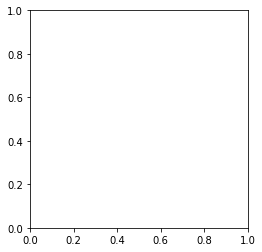

In [18]:
# plt.imshow(annos[:,:,1])
# # plt.imshow(annos[0][:,:,0])

In [9]:

images = torch.from_numpy(images)
annos = torch.from_numpy(annos)
images = images.permute(0,3,1,2)
annos = annos.permute(0,3,1,2)

print(images.shape)
print(annos.shape)

torch.Size([3, 3, 400, 400])
torch.Size([3, 2, 400, 400])


In [10]:



# class segNet(nn.Module):
#     def __init__(self, num_classes):
#         super(segNet, self).__init__()
#         # self.conv_1 = Conv2d(in_channels=channels,
#         #                     out_channels=num_filters_conv1,
#         #                     kernel_size=kernel_size_conv1,
#         #                     stride=stride_conv1)
        
        
#         self.conv1 = nn.Conv2d(3, 6, 3)   

     
#         self.fc1 = nn.Linear(6 * 398 * 398, 10) 
   


        
#         # Your code here!

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
    
#         x = x.view(-1, 6 * 398 * 398)
    
#         x = self.fc1(x)
      
#         return x
    

# net = segNet(images)
# print(net)

segNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=950424, out_features=10, bias=True)
)


In [23]:
class SegNet(nn.Module): 
    def __init__(self,input_nbr,label_nbr): 
        super(SegNet, self).__init__() 
        batchNorm_momentum = 0.1 
        self.conv11 = nn.Conv2d(input_nbr, 64, kernel_size=3, padding=1) 
        self.bn11 = nn.BatchNorm2d(64, momentum= batchNorm_momentum) 
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, padding=1) 
        self.bn12 = nn.BatchNorm2d(64, momentum= batchNorm_momentum) 
        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) 
        self.bn21 = nn.BatchNorm2d(128, momentum= batchNorm_momentum) 
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) 
        self.bn22 = nn.BatchNorm2d(128, momentum= batchNorm_momentum) 
        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) 
        self.bn31 = nn.BatchNorm2d(256, momentum= batchNorm_momentum) 
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) 
        self.bn32 = nn.BatchNorm2d(256, momentum= batchNorm_momentum) 
        self.conv33 = nn.Conv2d(256, 256, kernel_size=3, padding=1) 
        self.bn33 = nn.BatchNorm2d(256, momentum= batchNorm_momentum) 
        self.conv41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) 
        self.bn41 = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv42 = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn42 = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv43 = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn43 = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv51 = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn51 = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv52 = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn52 = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv53 = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn53 = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv53d = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn53d = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv52d = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn52d = nn.BatchNorm2d(512, momentum= batchNorm_momentum) 
        self.conv51d = nn.Conv2d(512, 512, kernel_size=3, padding=1) 
        self.bn51d = nn.BatchNorm2d(512,
    
net = SegNet(images,annos)
print(net)

RuntimeError: bool value of Tensor with more than one value is ambiguous

In [11]:
import torch.optim as optim

criterion = nn.BCELoss() # Your code here!

optimizer = optim.SGD(net.parameters(), lr=0.001,momentum=0.9,weight_decay=1e-4)  # Your code here!



train_dataset = Data.TensorDataset(images,annos)


In [20]:
num_epoch = 1 # Your code here!
steps = 3 
for epoch in range(num_epoch):  # loop over the dataset multiple times
    running_loss = 0.0
    
    net.train()

    for step in range(steps):
       
        images, annos = batch_generator(img_list, anno_list,batch_size, 2)
        images = torch.from_numpy(images)
        images = images.float()
        annos = torch.from_numpy(annos)
        annos=annos.long()
        
        images = images.permute(0,3,1,2)
        annos = annos.permute(0,3,1,2)
        print(images.shape)
        print(annos.shape)
        
        optimizer.zero_grad()
      
        outputs = net(images)
        print(outputs.shape)
        loss = criterion(outputs, annos)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.data #[0]
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            

        
print('Finished Training')

torch.Size([3, 3, 400, 400])
torch.Size([3, 2, 400, 400])
torch.Size([3, 10])


ValueError: Target and input must have the same number of elements. target nelement (960000) != input nelement (30)